In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive

/content/drive/My Drive


In [3]:
import sqlite3
import pandas as pd

con = sqlite3.connect('final.sqlite') 
final = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, con) 
final.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read nice rhythm well good re...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...


In [4]:
final.shape

(364171, 12)

In [5]:
import datetime as dt

# Drop index column 
reviews_df = final.drop(columns=['index'])
reviews_df['Time'] = reviews_df[['Time']].applymap(lambda x: dt.datetime.fromtimestamp(x))


reviews_df=reviews_df.sample(50000)

# Sort the data on the basis of time.
reviews_df = reviews_df.sort_values(by=['Time'])
cleaned_text = reviews_df['CleanedText'].values

print("Dataset Shape : \n",cleaned_text.shape)

Dataset Shape : 
 (50000,)


In [6]:
from collections import Counter
from itertools import islice

all_words=[]
for sentence in cleaned_text:
    words = sentence.split()
    all_words += words
    
print("Shape of the data : ",cleaned_text.shape)
print("Number of sentences present in complete dataset : ",len(all_words))

counts = Counter(all_words)
print("Number of unique words present in whole corpus: ",len(counts.most_common()))
vocab_size = len(counts.most_common()) + 1
top_words_count = 5000
sorted_words = counts.most_common(top_words_count)

word_index_lookup = dict()
i = 1
for word,frequency in sorted_words:
    word_index_lookup[word] = i
    i += 1

print()
print("Top 25 words with their frequencies:")
print(counts.most_common(25))
print()
print("Top 25 words with their index:")
print(list(islice(word_index_lookup.items(), 25)))

Shape of the data :  (50000,)
Number of sentences present in complete dataset :  1915849
Number of unique words present in whole corpus:  27416

Top 25 words with their frequencies:
[('like', 23669), ('tast', 22761), ('good', 17492), ('flavor', 17475), ('use', 16398), ('product', 16372), ('one', 16076), ('love', 15895), ('great', 15236), ('tri', 14402), ('tea', 13145), ('coffe', 13062), ('get', 11766), ('make', 11720), ('food', 10639), ('would', 10046), ('buy', 9378), ('time', 8872), ('realli', 8647), ('eat', 8432), ('order', 8188), ('amazon', 8085), ('dont', 8041), ('much', 7858), ('price', 7641)]

Top 25 words with their index:
[('like', 1), ('tast', 2), ('good', 3), ('flavor', 4), ('use', 5), ('product', 6), ('one', 7), ('love', 8), ('great', 9), ('tri', 10), ('tea', 11), ('coffe', 12), ('get', 13), ('make', 14), ('food', 15), ('would', 16), ('buy', 17), ('time', 18), ('realli', 19), ('eat', 20), ('order', 21), ('amazon', 22), ('dont', 23), ('much', 24), ('price', 25)]


In [7]:
def apply_text_index(row):  
    holder = []
    for word in row['CleanedText'].split():
        if word in word_index_lookup:
            holder.append(word_index_lookup[word]) 
        else:
            holder.append(0)            
    return holder


reviews_df['CleanedText_Index'] = reviews_df.apply(lambda row: apply_text_index(row),axis=1)
reviews_df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,CleanedText_Index
242,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,2000-06-29,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,receiv shipment could hard wait tri product lo...,"[175, 669, 74, 120, 430, 10, 6, 8, 306, 281, 3..."
837,149770,B00004S1C5,A1KXONFPU2XQ5K,Stephanie Manley,8,8,1,2000-08-09,Very easy to use,This are so much easier to use than the Wilson...,much easier use wilson past color color vibran...,"[24, 660, 5, 0, 369, 290, 290, 2816, 4182, 106..."
868,149789,B00004S1C6,A1KXONFPU2XQ5K,Stephanie Manley,26,28,1,2000-08-09,A must have!,"These are easy to use, they do not make a mess...",easi use make mess offer vibrant color taint d...,"[117, 5, 14, 747, 377, 2816, 290, 4182, 0, 290..."
296,374408,B00004CI84,A1GB1Q193DNFGR,Bruce Lee Pullen,5,5,1,2000-10-03,Fabulous Comedic Fanasy Directed by a Master,Beetlejuice is an awe-inspiring wonderfully am...,beetlejuic wonder amus comed romp explor incre...,"[4528, 116, 0, 0, 0, 3759, 937, 664, 0, 4258, ..."
1113,149697,B00006L2ZT,A2RSOEBCK1K70S,G. Preston,19,21,1,2002-11-07,Boxed Evolution,Long live Camper Van Beethoven!! This is a ble...,long live camper van beethoven bless long time...,"[136, 289, 3332, 2960, 0, 2467, 136, 18, 0, 34..."


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(reviews_df['CleanedText_Index'].values,
                                                            reviews_df['Score'],
                                                            test_size=0.3,
                                                            shuffle=False,
                                                            random_state=0)

In [9]:
print("Total number words present in first review:\n",len(x_train[1]))
print()
print("List of word indexes present in first review:\n", x_train[1])
print()

Total number words present in first review:
 23

List of word indexes present in first review:
 [24, 660, 5, 0, 369, 290, 290, 2816, 4182, 1061, 1, 290, 668, 5, 14, 747, 715, 26, 46, 309, 335, 1777, 433]



In [10]:
from keras.models import Sequential
from keras.preprocessing import sequence

max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

print("Total number words present in first review after padding:\n",len(x_train[1]))
print()
print("List of word indexes present in first review padding:\n", x_train[1])
print()

Using TensorFlow backend.


Total number words present in first review after padding:
 500

List of word indexes present in first review padding:
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    

In [0]:
# this function is used draw Binary Crossentropy Loss VS No. of epochs plot
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.regularizers import L1L2


# Bias regularizer value - we will use elasticnet
reg = L1L2(0.01, 0.01)


def plt_dynamic(x, vy, ty):
  plt.figure(figsize=(10,5))
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Binary Crossentropy Loss')
  plt.title('\nBinary Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()

<H1>M1:1LSTM-LAYER

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import he_normal
from keras.layers import BatchNormalization,Dropout


embedding_vecor_length = 32

model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_review_length))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(LSTM(100))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))

print(model1.summary())

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, nb_epoch=9, batch_size=512 ,verbose=1,validation_data=(x_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           877344    
_________________________________________________________________
batch_normalization_1 (Batch (None, 500, 32)           128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 35000 samples, validate on 15000 samples
Epoch 1/9
35000/35000 [==============================] - 59s 2ms/step - loss: 0.3758 - acc: 0.8579 - val_loss: 0.5147 - val_acc: 0.8357
Epoch 2/9
35000/35000 [==============================] - 55s 2ms/step - loss: 0.2085 - acc: 0.9159 - val_loss: 0.3953 - val_acc: 0.8717
Epoch 3/9
35000/35000 [==============================] - 56s 2ms/step - loss: 0.1670 - acc: 0.9347 - val_loss: 0.3396 - val_acc: 0.8909
Epoch 4/9
35000/35000 [==============================] - 56s 2ms/step - loss: 0.1435 - acc: 0.9447 - val_loss: 0.2892 - val_acc: 0.9037
Epoch 5/9
35000/35000 [==============================] - 54s 2ms/step - loss: 0.1217 - acc: 0.9538 - val_loss: 0.3180 - val_acc: 0.9035
Epoch 6/9
35000/35000 [==============================] - 55s 2ms/step - loss: 0.1048 - acc: 0.9615 - val_loss: 0.3182 - val_acc: 0.9038
Epoch 7/9
35000/35000 [==============================] - 55s 2ms/step - loss: 0.0936 - acc: 0.9653 - val_loss: 0.3460 - val_acc: 0.902

Accuracy: 89.17%


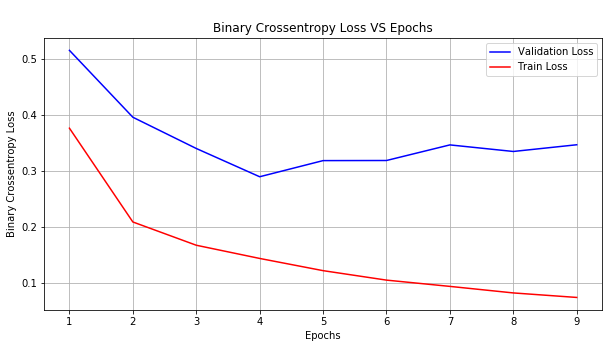

In [17]:
# Final evaluation of the model
scores = model1.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model1test = scores[1]
model1train = max(history1.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,10))

# Validation loss
vy = history1.history['val_loss']
# Training loss
ty = history1.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

<H1>M2: 2LSTM-LAYERS

In [18]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_review_length))
model2.add(LSTM(100,return_sequences=True, dropout=0.4, recurrent_dropout=0.4))
model2.add(LSTM(100, dropout=0.4, recurrent_dropout=0.4))
model2.add(Dense(1, activation='sigmoid'))

print(model2.summary())

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, nb_epoch=10, batch_size=512 ,verbose=1,validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           877344    
_________________________________________________________________
lstm_2 (LSTM)                (None, 500, 100)          53200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,011,045
Trainable params: 1,011,045
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 126s 4ms/step - loss: 0.4270 - acc: 0.8465 - val_loss: 0.2978 - val_acc: 0.8731
Epoch 2/10
35000/35000 [==============================] - 124s 4ms/step - loss: 0.2445 - acc: 0.9024 - val_loss: 0.2552 - val_acc: 0.8949
Epoch 3/10
35000/35000 [==============================] - 123s 4ms/step - loss: 0.2053 - acc: 0.9213 - val_loss: 0.2489 - val_acc: 0.9017
Epoch 4/10
35000/35000 [==============================] - 123s 4ms/step - loss: 0.1871 - acc: 0.9289 - val_loss: 0.2749 - val_acc: 0.9033
Epoch 5/10
35000/35000 [==============================] - 122s 3ms/step - loss: 0.1732 - acc: 0.9345 - val_loss: 0.2511 - val_acc: 0.9050
Epoch 6/10
35000/35000 [==============================] - 124s 4ms/step - loss: 0.1616 - acc: 0.9413 - val_loss: 0.2582 - val_acc: 0.9040
Epoch 7/10
35000/35000 [==============================] - 121s 3ms/step - loss: 0.1555 - acc: 0.9412 - val_loss: 0.2664 - 

Accuracy: 90.12%


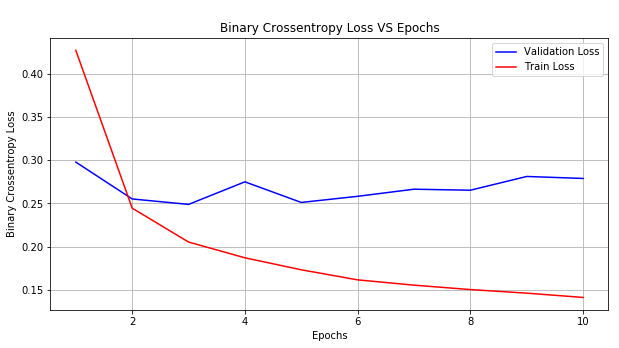

In [19]:
# Final evaluation of the model
scores = model2.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model2test = scores[1]
model2train = max(history2.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,11))

# Validation loss
vy = history2.history['val_loss']
# Training loss
ty = history2.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

<H1>M3: 5LSTM-LAYERS

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import he_normal
from keras.layers import BatchNormalization,Dropout





embedding_vecor_length = 32

model3 = Sequential()
model3.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_review_length))
model3.add(BatchNormalization())
model3.add(Dropout(0.20))
model3.add(LSTM(100,return_sequences=True,bias_regularizer=reg))
model3.add(Dropout(0.20))
model3.add(LSTM(80,return_sequences=True,bias_regularizer=reg))
model3.add(Dropout(0.20))
model3.add(LSTM(60,return_sequences=True,bias_regularizer=reg))
model3.add(Dropout(0.30))
model3.add(LSTM(40,return_sequences=True,bias_regularizer=reg))
model3.add(BatchNormalization())
model3.add(Dropout(0.40))
model3.add(LSTM(20))
model3.add(Dropout(0.50))
model3.add(Dense(1, activation='sigmoid'))

print("Model Summary: \n")
model3.summary()
print()
print()

 
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history3 = model3.fit(x_train, y_train, batch_size = 512, epochs = 7, verbose=1, validation_data=(x_test, y_test))

Model Summary: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           877344    
_________________________________________________________________
batch_normalization_2 (Batch (None, 500, 32)           128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 500, 100)          53200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 500, 80)           57920     
_________________________________________________________________
dropout_5 (Dropout)          (None, 500, 80)           0   

Accuracy: 89.98%


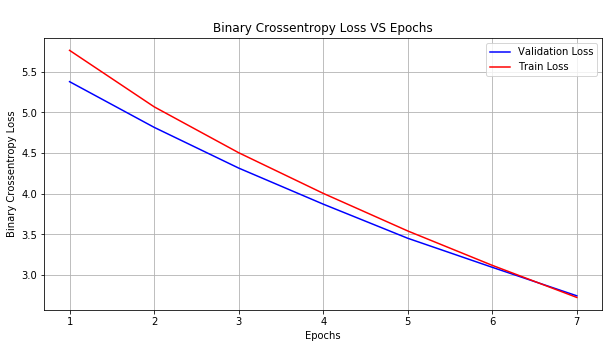

In [22]:
# Final evaluation of the model
scores = model3.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model3test = scores[1]
model3train = max(history3.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,8))

# Validation loss
vy = history3.history['val_loss']
# Training loss
ty = history3.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [23]:
# Creating table using PrettyTable library
from prettytable import PrettyTable

# Names of models
names = ['RNN With 1 LSTM Layer','RNN With 2 LSTM Layers','RNN With 5 LSTM Layers']

# Training accuracies
train_acc = [model1train,model2train,model3train]

# Test accuracies
test_acc = [model1test,model2test,model3test]

numbering = [1,2,3]

# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("MODEL",names)
ptable.add_column("Training Accuracy",train_acc)
ptable.add_column("Test Accuracy",test_acc)

# Printing the Table
print(ptable)

+-------+------------------------+--------------------+--------------------+
| S.NO. |         MODEL          | Training Accuracy  |   Test Accuracy    |
+-------+------------------------+--------------------+--------------------+
|   1   | RNN With 1 LSTM Layer  | 0.9727714285986764 | 0.8916666666348775 |
|   2   | RNN With 2 LSTM Layers | 0.9481142856052943 | 0.9012000000317891 |
|   3   | RNN With 5 LSTM Layers |  0.95648571434021  | 0.8997999999682108 |
+-------+------------------------+--------------------+--------------------+
